In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np

### communitiy

In [2]:
G = nx.barbell_graph(5, 1)
print(type(G))

<class 'networkx.classes.graph.Graph'>


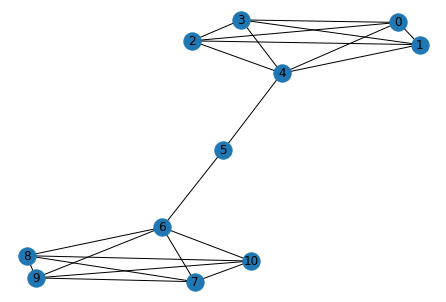

In [3]:
nx.draw(G, with_labels=True)
plt.show()

In [4]:
# Bipartitions: Functions for computing the Kernighan–Lin bipartition algorithm.

# kernighan_lin_bisection(G[, partition, …])
kernighan_lin = community.kernighan_lin_bisection(G) # Partition a graph into two blocks using the Kernighan–Lin algorithm.
print(kernighan_lin)
print(type(kernighan_lin))

({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9, 10})
<class 'tuple'>


In [141]:
# K-Clique

# k_clique_communities(G, k[, cliques])
k_clique = list(community.k_clique_communities(G, 4)) # Find k-clique communities in graph using the percolation method.
print(type(k_clique))
k_clique

<class 'list'>


[frozenset({0, 1, 2, 3, 4}), frozenset({6, 7, 8, 9, 10})]

In [136]:
# Modularity-based communities: Functions for detecting communities based on modularity.

# greedy_modularity_communities(G[, weight])
greedy_modular = community.greedy_modularity_communities(G) # Find communities in graph using Clauset-Newman-Moore greedy modularity maximization.
print(list(greedy_modular)) # return type: yields sets of nodes, one for each k-clique community.
print(type(greedy_modular))

[frozenset({0, 1, 2, 3, 4, 5}), frozenset({6, 7, 8, 9, 10})]
<class 'list'>


In [7]:
# Label propagation: Label propagation community detection algorithms.

# asyn_lpa_communities(G[, weight, seed])
asyn_lpa = community.asyn_lpa_communities(G) # Returns communities in G as detected by asynchronous label propagation.
print(list(asyn_lpa))
print(type(asyn_lpa))


# label_propagation_communities(G)
label_propagation = community.label_propagation_communities(G) # Generates community sets determined by label propagation
print(list(label_propagation))
print(type(label_propagation))

[{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10}]
<class 'dict_valueiterator'>
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]
<class 'generator'>


In [24]:
# Fluid Communities: Asynchronous Fluid Communities algorithm for community detection.

# asyn_fluidc(G, k[, max_iter, seed])
asyn_fluid = community.asyn_fluidc(G, 3) # Returns communities in G as detected by Fluid Communities algorithm.
print(list(asyn_fluid))
print(type(asyn_fluid))

[{0, 1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5}]
<class 'dict_valueiterator'>


In [25]:
# Measuring partitions: Functions for measuring the quality of a partition (into communities).

# coverage(G, partition)
coverage = community.coverage(G, kernighan_lin) # Returns the coverage of a partition; using partition from kernighan_lin bipartition in this example
print(coverage)

# performance(G, partition)
performance = community.performance(G, kernighan_lin) # Returns the performance of a partition; using partition from kernighan_lin_bisection() bipartition in this example
print(performance)

0.9545454545454546
0.9090909090909091


In [26]:
# Partitions via centrality measures: Functions for computing communities based on centrality notions.

# girvan_newman(G[, most_valuable_edge])
girvan_newman = community.girvan_newman(G) # Finds communities in a graph using the Girvan–Newman method.
print(list(girvan_newman))

[({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9, 10}), ({0, 1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5}), ({0}, {1, 2, 3, 4}, {6, 7, 8, 9, 10}, {5}), ({0}, {1}, {2, 3, 4}, {6, 7, 8, 9, 10}, {5}), ({0}, {1}, {2}, {3, 4}, {6, 7, 8, 9, 10}, {5}), ({0}, {1}, {2}, {3}, {4}, {6, 7, 8, 9, 10}, {5}), ({0}, {1}, {2}, {3}, {4}, {6}, {8, 9, 10, 7}, {5}), ({0}, {1}, {2}, {3}, {4}, {6}, {7}, {8, 9, 10}, {5}), ({0}, {1}, {2}, {3}, {4}, {6}, {7}, {8}, {9, 10}, {5}), ({0}, {1}, {2}, {3}, {4}, {6}, {7}, {8}, {9}, {10}, {5})]


In [27]:
# Validating partitions: Helper functions for community-finding algorithms.

# is_partition(G, communities)
community.is_partition(G, greedy_modular) # Returns True if communities is a partition of the nodes of G; example uses communities using greedy_modular_communities()

True

### python-louvain

In [28]:
import community as community_louvain
import matplotlib.cm as cm

In [29]:
#compute the best partition
partition = community_louvain.best_partition(G)

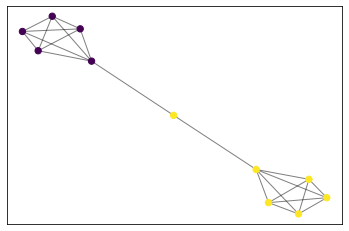

In [30]:
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [31]:
print(type(greedy_modular))
print(greedy_modular)

<class 'list'>
[frozenset({0, 1, 2, 3, 4, 5}), frozenset({6, 7, 8, 9, 10})]


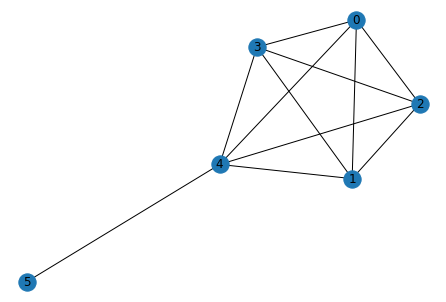

In [32]:
G_sub = G.subgraph(greedy_modular[0])
nx.draw(G_sub, with_labels=True)
plt.show()

In [33]:
print(partition)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 5: 1}


In [34]:
type(label_propagation)

generator

In [35]:
max_key = max(partition, key=partition.get)
print(partition[max_key])

1


In [100]:
asyn_lpa = community.asyn_lpa_communities(G) # Returns communities in G as detected by asynchronous label propagation.
print(type(asyn_lpa))

<class 'dict_valueiterator'>


In [101]:
type(asyn_lpa)

dict_valueiterator

In [102]:
asyn_lpa_list = list(asyn_lpa)

In [104]:
asyn_lpa_list[0]

{0, 1, 2, 3, 4}

In [105]:
type(G)

networkx.classes.graph.Graph

In [106]:
G_dir = G.to_directed(G)

In [108]:
type(G_dir)

networkx.classes.digraph.DiGraph

In [110]:
# greedy_modularity_communities(G[, weight])
greedy_modular_dir = community.greedy_modularity_communities(G_dir) # Find communities in graph using Clauset-Newman-Moore greedy modularity maximization.

In [113]:
print(greedy_modular)
print(greedy_modular_dir)

[frozenset({0, 1, 2, 3, 4, 5}), frozenset({6, 7, 8, 9, 10})]
[frozenset({6, 7, 8, 9, 10}), frozenset({0, 1, 2, 3}), frozenset({4, 5})]


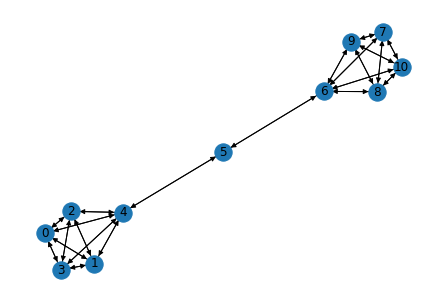

In [116]:
nx.draw(G_dir, with_labels = True)

{0, 1, 2, 3, 4, 5}

In [69]:
Gt = nx.Graph()

In [70]:
Gt.add_nodes_from([1,4])
Gt.add_edges_from([(1,3), (1,2), (2,3)])

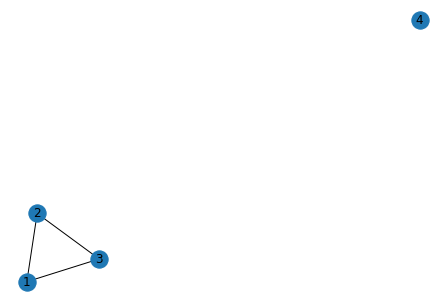

In [71]:
nx.draw(Gt, with_labels=True)
plt.show()

> trying to do it the long way lol

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community as com
import pandas as pd

In [73]:
# nodes_df = pd.DataFrame([25.917000000186725, -24.666999999954218], [25.9047571, -24.6667781], [53.394000000101364, 35.57499999971285], index=[0, 1, 2], columns=['coordinates'])

node_df = pd.DataFrame([[[25.917000000186725, -24.666999999954218], 2, 3], [[25.9047571, -24.6667781], 4, 1], [[53.394000000101364, 35.57499999971285], 20, 30]],
                  index=[0, 1, 2], columns=['coordinates', 'B', 'C'])

In [74]:
node_df

,coordinates,B,C
0,"[25.917000000186725, -24.666999999954218]",2,3
1,"[25.9047571, -24.6667781]",4,1
2,"[53.394000000101364, 35.57499999971285]",20,30


In [75]:
#node_df.iat[0, 0]
node_df.at[0, 'coordinates']

[25.917000000186725, -24.666999999954218]

In [76]:
edge_df = pd.DataFrame([[[25.917000000186725, -24.666999999954218], [53.394000000101364, 35.57499999971285], 3], [[25.917000000186725, -24.666999999954218] , [25.9047571, -24.6667781], 1], [[25.9047571, -24.6667781], [53.394000000101364, 35.57499999971285], 3]],
                  index=[0, 1, 2], columns=['start_coordinates', 'end_coordinates', 'C'])




In [77]:
edge_df

,start_coordinates,end_coordinates,C
0,"[25.917000000186725, -24.666999999954218]","[53.394000000101364, 35.57499999971285]",3
1,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]",1
2,"[25.9047571, -24.6667781]","[53.394000000101364, 35.57499999971285]",3


In [78]:
G_test = nx.Graph()
G_test.add_nodes_from([0, node_df.shape[0]-1])


for i in range(0, edge_df.shape[0]):
    print(edge_df.at[i, 'start_coordinates'])
    for j in range(0, node_df.shape[0]):
        if edge_df.at[i, 'start_coordinates'] == node_df.at[j, 'coordinates']:
            for k in range(0, node_df.shape[0]):
                if edge_df.at[i, 'end_coordinates'] == node_df.at[k, 'coordinates']:
                    print(edge_df.at[i, 'end_coordinates'])
                    G_test.add_edges_from([(j,k)])
                    

[25.917000000186725, -24.666999999954218]
[53.394000000101364, 35.57499999971285]
[25.917000000186725, -24.666999999954218]
[25.9047571, -24.6667781]
[25.9047571, -24.6667781]
[53.394000000101364, 35.57499999971285]


In [79]:
node_df.iat[0, 0]

[25.917000000186725, -24.666999999954218]

In [80]:
edge_df.shape[0]

3

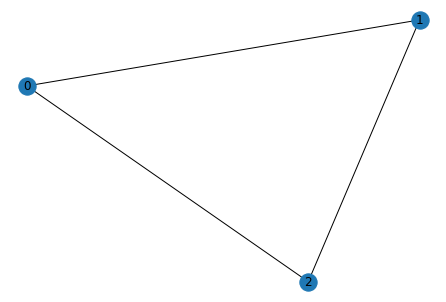

In [81]:
nx.draw(G_test, with_labels=True)
plt.show()

> using networkx 

In [82]:
r = np.random.RandomState(seed=5)
ints = r.randint(1, 10, size=(3,2))
a = ['A', 'B', 'C']
b = ['D', 'A', 'E']

df = pd.DataFrame(ints, columns=['weight', 'cost'])

df['start_coordinates'] = a
df['end_coordinates'] = b


In [83]:
df

,weight,cost,start_coordinates,end_coordinates
0,4,7,A,D
1,7,1,B,A
2,9,5,C,E


In [84]:
# G = nx.from_pandas_edgelist(df, 0, 'b', ['weight', 'cost'])

G = nx.from_pandas_edgelist(df, 'start_coordinates', 'end_coordinates')


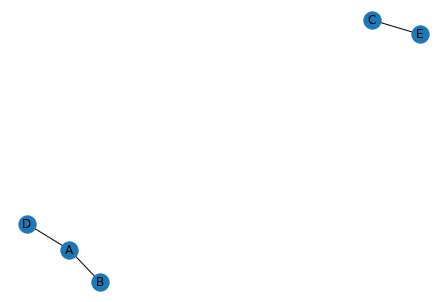

In [85]:
nx.draw(G, with_labels=True)
plt.show()

In [86]:
type(df)

pandas.core.frame.DataFrame

> using networkx but converting coordinates to strings

In [87]:
r2 = np.random.RandomState(seed=5)
ints2 = r.randint(1, 10, size=(3,2))
a2 = [[15, 2], [15, 2], [15, 2]]
b2 = [[15,3], [15, 4], [15,5]]

df2 = pd.DataFrame(ints, columns=['weight', 'cost'])

df2['start_coordinates'] = a2
df2['end_coordinates'] = b2

In [88]:
df2

,weight,cost,start_coordinates,end_coordinates
0,4,7,"[15, 2]","[15, 3]"
1,7,1,"[15, 2]","[15, 4]"
2,9,5,"[15, 2]","[15, 5]"


In [89]:
# G = nx.from_pandas_edgelist(df, 0, 'b', ['weight', 'cost'])

G2 = nx.from_pandas_edgelist(df2, 'start_coordinates', 'end_coordinates')

TypeError: unhashable type: 'list'

In [90]:
print(type(df2.iat[0,3]))
df2_mod = df2
for i in range(0, df2_mod.shape[0]):
    df2_mod.at[i,'start_coordinates'] = str(df2_mod.at[i,'start_coordinates'])
    df2_mod.at[i,'end_coordinates'] = str(df2_mod.at[i,'end_coordinates'])

<class 'list'>


In [91]:
df2_mod

,weight,cost,start_coordinates,end_coordinates
0,4,7,"[15, 2]","[15, 3]"
1,7,1,"[15, 2]","[15, 4]"
2,9,5,"[15, 2]","[15, 5]"


In [92]:
type(df2_mod.iat[0,3])

str

In [93]:
G2 = nx.from_pandas_edgelist(df2_mod, 'start_coordinates', 'end_coordinates')

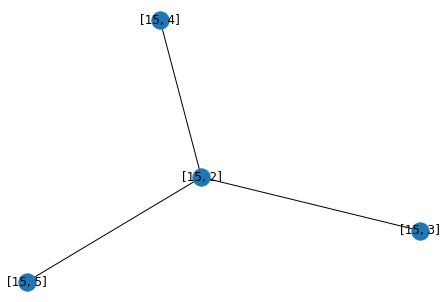

In [94]:
nx.draw(G2, with_labels=True)
plt.show()